Zihao Mao

Cameron Matson

9/22/2017

# Lab 3: Images

## Introduction

For this lab we examine the images of the Stanford Dog Dataset.  The dataset consits of ~20,000 images of dogs from 120 different breeds.

#### Issues
The dataset is primarily used for fine-grained classification problems, meaning that the instances are all members of the same main class and are divided by subclass.  In this case, the main class is 'Dog' and the subclass is the breed: 'Beagle', 'Poodle', 'Lab'...  These are potentially more difficult than standard classification problems because in theory all members of teh main class should at least share similar features.  In other words as the saying goes "a dog is a dog is a dog not a cat."

Another challenge with this dataset is that there is that they do not depict a standard scene.  These are not faces of dogs.  These are not photoshoot photos of dogs.  The images in the dataset are not even exclusively of dogs.  Some contain multiple dogs or even people.  The dataset would benefit from preprocessing in the form of some sort of standardization such that all the images are of the same kind, using facial detection for instance.

#### Uses
We imagine one potential use for the finegrained classification of dogs could be used in searching for lost pets.  Imagine poor Susan has lost her precious Bichon Frise, Tutu.  She goes to her local police station and demands that they check all of the town's traffic cameras for traces of Tutu.  Well, they say there's hours of footage, and we don't want to look at it.  Poor Susan.  Now suppose there is a program that will "watch" the video and recognize when there is a four legged animal in view.  The image could then be put through a classifier to detect if that 4 legged beast is a dog or a cat (or something else).  Hooray!  It's a dog!  Now the image is put through a *fine-grained* classifier, which is able to tell that the dog **IS** in fact a Bichon Frise and not a Yorkshire Terrier.  The police are then able to determine where Tutu is and Susan is very happy.

#### Accuracy
How well does a system like that need to work?  Well each successive level probably does not need to be as precise as the last (and it likely won't be cause each successive level is more difficult than the last.)  Assuming you do a good job of identifying the quadraped, and then identifying it as a dog, you could probably get away with around 50% accuracy in identifying the dog as a Bichon Firse, but you'd want as few type II errors as possible, because you wouldn't want to miss poor Tutu.

In [1]:
# first we need to relabel the folders

#import os

#imagedir = '../../data/dogs/Images'
#for f in os.listdir(imagedir):
#    if f[0] == '.': # stupid .DS_Store on mac
#        continue
#    if '-' in f:
#        name = f.split('-',2)[1]
#        os.renames(os.path.join(imagedir,f), os.path.join(imagedir,name))
#
#for f in os.listdir(imagedir):
#    print(f)

In [2]:
# lets rename the images so its more readable
#for breed in os.listdir(imagedir):
#    if breed[0] == '.': continue
#    for img in os.listdir(os.path.join(imagedir,breed)):
#        tail = img.split('_',2)[1]
#        name = breed+'_'+tail
#        os.rename(os.path.join(imagedir,breed,img), os.path.join(imagedir,breed,name))

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../data/dogs/Images'

## Data Preprocessing

There are 120 different breeds included in the dataset with bout 150 images of each breed for a total of 20,580 images.  The images are stored in directories by breed.  To make the size of the dataset more managable, we'll take a sample of 50 images from each 60 of the breed.

In [273]:
def load_images(num_samples, num_classes, h, w):
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    a = np.arange(len(os.listdir(imagedir)))
    np.random.shuffle(a)
    breed_sample_idxs = a[:num_classes]
    for idx in breed_sample_idxs:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(int(i/num_samples),breed)
        
        # sample 50 images from the breed
        b = np.arange(len(os.listdir(os.path.join(imagedir,breed))))
        np.random.shuffle(b)
        img_sample_idxs = b[:num_samples]
        for idx in img_sample_idxs:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            if breed[0] == '.' : continue # stupid ds.store on mac

            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [274]:
%%time
num_samples_per_breed = 50
num_breeds = 60
h=200
w=200
dogs, labels = load_images(num_samples=num_samples_per_breed, num_classes=num_breeds, h=h, w=w)


0 affenpinscher
1 Scotch_terrier
2 Brabancon_griffon
3 schipperke
4 Weimaraner
5 Walker_hound
6 whippet
7 Labrador_retriever
8 Ibizan_hound
9 Norfolk_terrier
10 Old_English_sheepdog
11 kelpie
12 Boston_bull
13 briard
14 basenji
15 dingo
16 Shih
17 Kerry_blue_terrier
18 Rottweiler
19 curly
20 kuvasz
21 Pomeranian
22 soft
23 Sealyham_terrier
24 bluetick
25 bloodhound
26 Chesapeake_Bay_retriever
27 Sussex_spaniel
28 miniature_schnauzer
29 West_Highland_white_terrier
30 Samoyed
31 Newfoundland
32 miniature_pinscher
33 Doberman
34 Mexican_hairless
35 cocker_spaniel
36 malinois
37 Irish_terrier
38 otterhound
39 Lhasa
40 German_shepherd
41 Shetland_sheepdog
42 bull_mastiff
43 Leonberg
44 standard_schnauzer
45 pug
46 giant_schnauzer
47 groenendael
48 boxer
49 borzoi
50 Irish_wolfhound
51 vizsla
52 Great_Pyrenees
53 African_hunting_dog
54 Afghan_hound
55 Siberian_husky
56 Border_terrier
57 Bouvier_des_Flandres
58 Japanese_spaniel
59 papillon
CPU times: user 34.9 s, sys: 2.7 s, total: 37.6 s
Wal

In [275]:
import pandas as pd

X = pd.DataFrame(dogs)
X

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.907499,0.915342,0.924875,0.927398,0.926282,0.927688,0.929905,0.927345,0.931832,0.944713,...,0.866064,0.869985,0.863549,0.864114,0.871667,0.873051,0.867165,0.811965,0.596829,0.679465
1,0.842779,0.846701,0.845019,0.824563,0.816988,0.821460,0.825099,0.825649,0.830970,0.831253,...,0.178873,0.158983,0.176894,0.191464,0.202678,0.193451,0.176947,0.186494,0.193787,0.187060
2,0.784823,0.784823,0.784823,0.780901,0.780901,0.780901,0.776980,0.776980,0.776980,0.776980,...,0.344245,0.177360,0.118880,0.131991,0.241436,0.378371,0.487892,0.530784,0.521557,0.436116
3,0.972817,0.980660,0.976738,0.964974,0.949287,0.953209,0.964974,0.972817,0.953209,0.941444,...,0.843658,0.831893,0.841686,0.739725,0.676980,0.767176,0.867455,0.812553,0.773338,0.843926
4,0.970792,0.973315,0.964906,0.970517,0.967452,0.974179,0.977237,0.978338,0.981709,0.982840,...,0.082187,0.079099,0.083571,0.083571,0.083571,0.087493,0.091415,0.083571,0.081622,0.080789
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.943647,0.920936,0.904692,0.880046,0.899937,0.880895,0.839156,0.764929,0.692071,0.653674
6,0.838650,0.805329,0.777626,0.755488,0.724354,0.696613,0.682869,0.671067,0.668552,0.661282,...,0.124031,0.105570,0.103375,0.104514,0.111218,0.097787,0.123266,0.124405,0.138730,0.154959
7,0.162176,0.173941,0.354333,0.346207,0.228277,0.243964,0.396905,0.493262,0.501105,0.497184,...,0.365379,0.373222,0.403762,0.450255,0.475742,0.475742,0.460055,0.467898,0.463977,0.467898
8,0.221069,0.364700,0.463818,0.431604,0.451226,0.655997,0.603037,0.729035,0.665688,0.608033,...,0.828037,0.815990,0.796933,0.798331,0.802818,0.799462,0.750164,0.801709,0.811793,0.784892
9,0.286940,0.305951,0.322158,0.312052,0.287116,0.269465,0.263564,0.261630,0.270909,0.280189,...,0.894852,0.911906,0.934673,0.973636,0.914255,0.865733,0.716975,0.701303,0.871291,0.617290


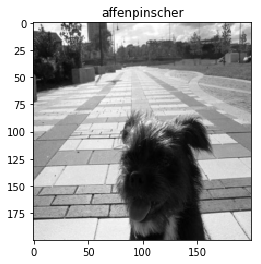

In [276]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [277]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

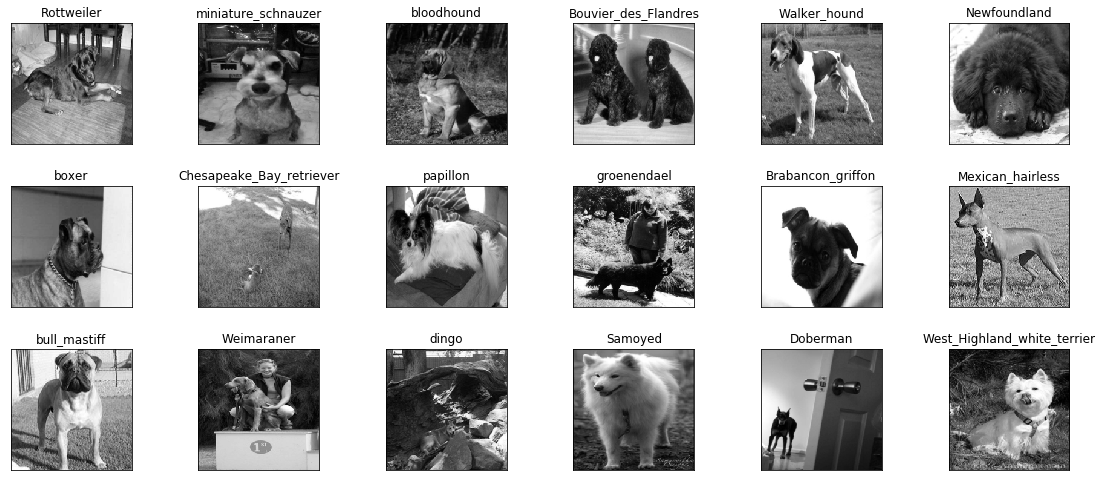

In [278]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

Aren't they cute?  The answer is yes. They are.

## Feature Extraction
### Gradient

Let's start by doing a simple edge detection using the gradient (a.k.a a sobel filter)

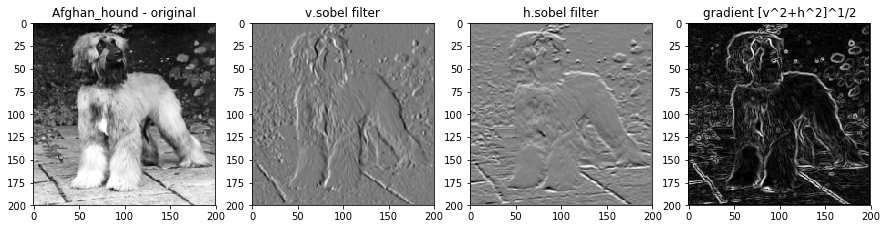

In [279]:
from skimage.filters import sobel_h, sobel_v

idx_to_reconstruct = int(np.random.rand(1)*len(dogs))
img  = dogs[idx_to_reconstruct].reshape((h,w))

plt.figure(figsize=(15,30))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title(labels[idx_to_reconstruct]+' - original')

plt.subplot(1,4,2)
plt.imshow(sobel_v(img,), cmap='gray')
plt.title('v.sobel filter')

plt.subplot(1,4,3)
plt.imshow(sobel_h(img), cmap='gray')
plt.title('h.sobel filter')

plt.subplot(1,4,4)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
plt.imshow(gradient_mag, cmap='gray')
plt.title('gradient [v^2+h^2]^1/2')
plt.show()

Let's take the gradient of each image in the dataset and see if we can use it to classify the breed.  Or at least get similar looking images...

In [280]:
def take_gradient(row, shape):
    img = row.reshape(shape)
    gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
    return gradient_mag.reshape(-1)
# case
%time take_gradient(dogs[0], ((h,w))).shape

CPU times: user 2.34 ms, sys: 510 µs, total: 2.85 ms
Wall time: 2.04 ms


(40000,)

In [281]:
%time grad_features = np.apply_along_axis(take_gradient, 1, dogs, (h,w))
print(grad_features.shape)

CPU times: user 4.43 s, sys: 777 ms, total: 5.2 s
Wall time: 5.57 s
(3000, 40000)


Let's take a quick look at some of these

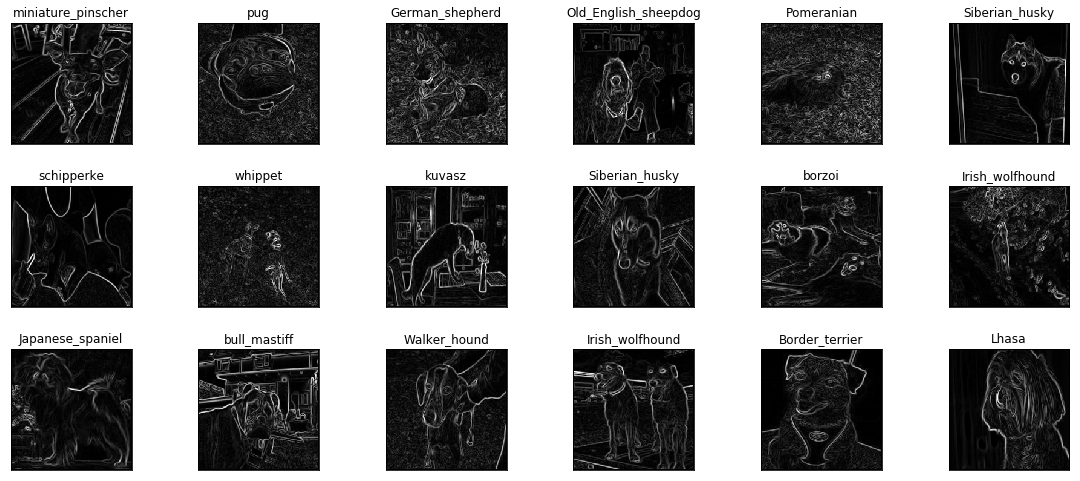

In [282]:
plot_gallery(grad_features, labels, h, w) 

This doesn't look too promising, but let's keep going.

In [283]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(grad_features)

CPU times: user 18.6 s, sys: 717 ms, total: 19.3 s
Wall time: 11.3 s


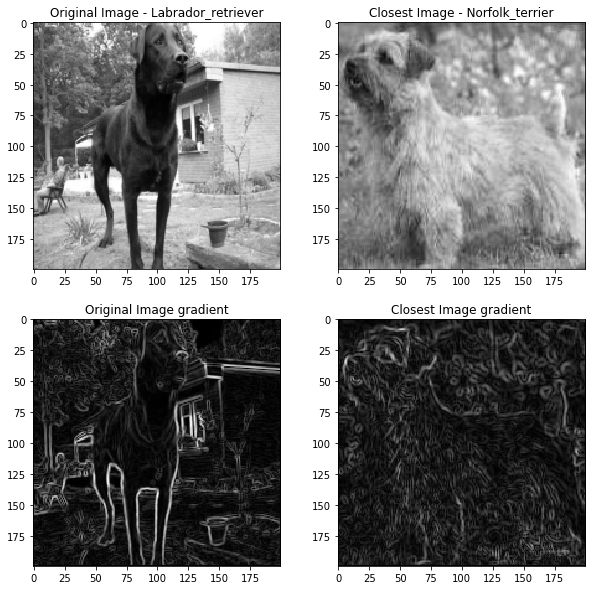

In [286]:
import copy
# find closest image to current image
idx1 = np.random.randint(0,len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - " + labels[idx1])

plt.subplot(2,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - " + labels[idx2])

plt.subplot(2,2,3)
plt.imshow(grad_features[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image gradient")

plt.subplot(2,2,4)
plt.imshow(grad_features[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image gradient")

plt.show()

This method doesn't work very well for this dataset since its extremely sensitive position of the object in the image.  If two images are very "close" to one another using this method it is more likely that subject of the image are in similar positions, rather than the subjects being similar to one another.  For example consider the match from one iteration below:

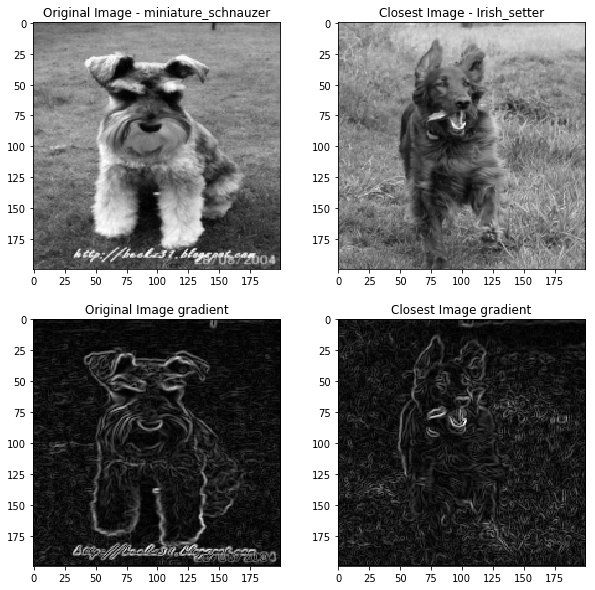

No one would ever mistake a miniature schnauzer for an Irish setter.  However, in these particular images the two dogs are both forward facing, approximately the same size relative to the size of the image, and pictured with a grassy background.  Thus, by their gradients, the images are similar.

We can illustrate this by looking at a heatmap of the pairwise distance of the gradients:

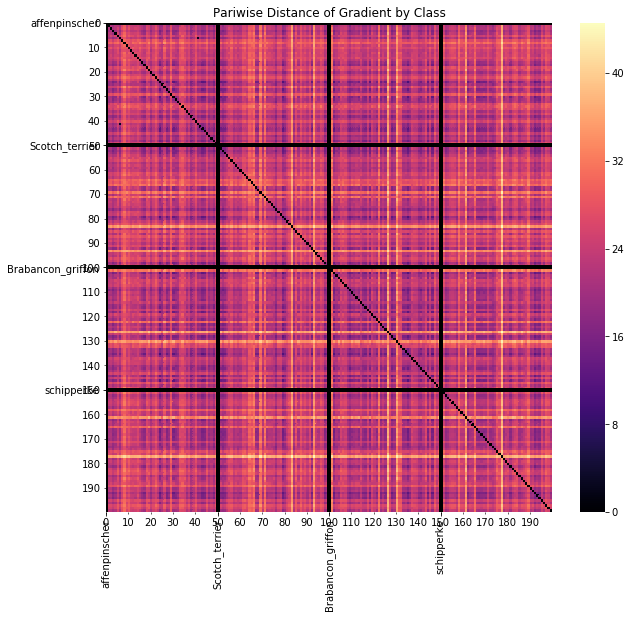

In [287]:
import seaborn as sns

plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of Gradient by Class')

plt.show()


This heatmap shows the pairwise distance between the instances of the first four breeds in the dataset. If minimizing the distance in the gradient were any good as a classifier, one would expect there to be significantly darker colors within each major square along the diagnol vs. the rest of the grid.  Since each square in the 4x4 grid has roughly the same distribution of colors, we can conclude that this is not a good classifier.

### DAISY

Let's see if using the DAISY method is any more effective as a classifier.

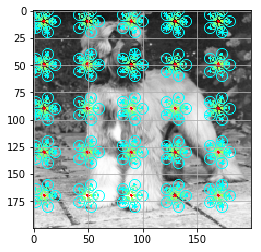

In [289]:
from skimage.feature import daisy
# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img,step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
plt.imshow(img_desc, cmap='gray')
plt.grid()

In [294]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(dogs[3],(h,w))
test_feature.shape


CPU times: user 61.7 ms, sys: 9.42 ms, total: 71.1 ms
Wall time: 70.9 ms


(33696,)

In [295]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, dogs, (h,w))
print(daisy_features.shape)

CPU times: user 2min 45s, sys: 25.6 s, total: 3min 10s
Wall time: 3min 24s
(3000, 33696)


In [296]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 14.7 s, sys: 131 ms, total: 14.8 s
Wall time: 8.21 s


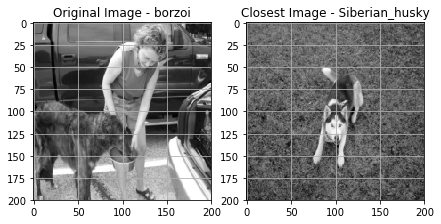

In [327]:
import copy
# find closest image to current image
idx1 = np.random.randint(len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - "+labels[idx1])
plt.grid()

plt.subplot(1,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - "+labels[idx2])
plt.grid()

Hey!  It actually got one right!

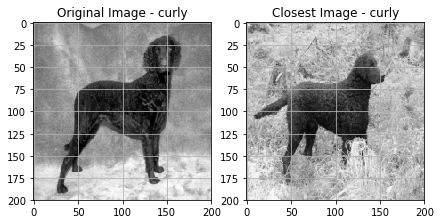

However these two images are of the curly in ** *VERY* ** similar poses

Now this is interesting

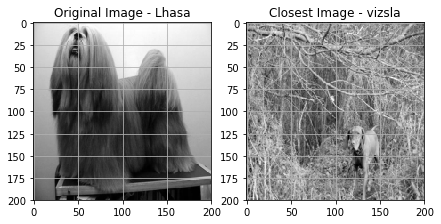

It looks like the outline of the branches is most similar to this very long haired dog.


On inspection it looks like this does at least a little better than the gradient method, but it still seems to be working on the context of the image more than the content in it, i.e. the potition and orientation of the dog rather than the characteristics of the dog itself

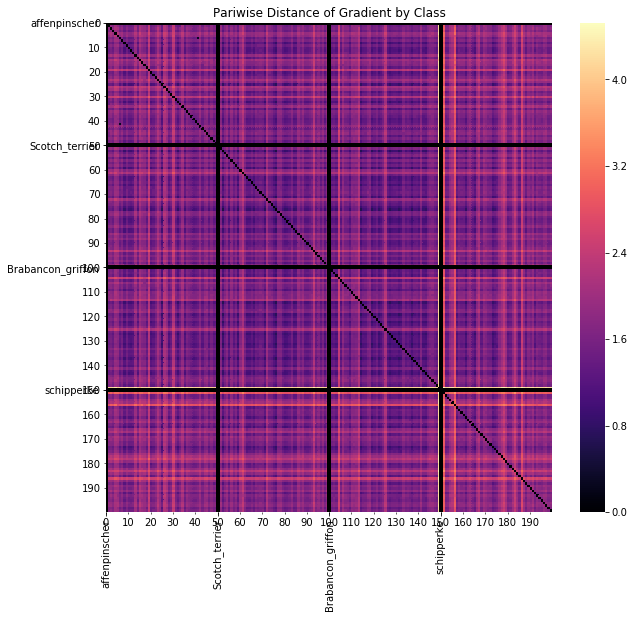

In [328]:

plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of Gradient by Class')

plt.show()

When we look at the same heatmap as before we see that overall the distances are reduced (there seems to also be a factor of 10 in the daisy computation) but again there is no reall difference between classes.